### Hypothesis testing- SCM

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel(r'C:\Users\Shubham Dandak\Downloads\Supplychain train dataset.xlsx')

In [5]:
data.head(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,...,1,77,27.0,2010.0,24,0,B,3,6,30142
7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,7183,...,0,241,23.0,NaN,18,0,C,6,24,24093
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,3869,...,0,78,43.0,NaN,6,0,C,6,2,7130


In [6]:
data= data.drop(['Ware_house_ID','WH_Manager_ID'],axis=1)

In [7]:
data.head(10)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,...,1,77,27.0,2010.0,24,0,B,3,6,30142
7,Rural,Large,North,Zone 5,1,0,4,7183,Rented,45,...,0,241,23.0,NaN,18,0,C,6,24,24093
8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,35,...,0,78,43.0,NaN,6,0,C,6,2,7130


#### Assumption: 1
- Location type has an direct impact on product weight tonnes i.e. Urban areas will be having more product tonnes weight than Rural counterpart (H0(Product_wgt_ton) = urban > rural, H1(Product_wgt_ton) = urban =< rural)

In [81]:
data_rural = data[data['Location_type']=='Rural']

In [82]:
data_rural

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,Rural,Large,North,Zone 6,8,1,3,5030,Rented,46,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,Rural,Small,South,Zone 6,3,1,3,4320,Rented,60,...,0,170,NaN,NaN,26,0,C,5,9,33108
22147,Rural,Large,North,Zone 6,7,2,2,5268,Company Owned,64,...,0,99,22.0,NaN,20,0,B+,6,4,24072
22148,Rural,Large,North,Zone 6,6,2,4,4378,Rented,32,...,0,220,17.0,NaN,13,0,B,3,28,15055


C:\Users\Shubham Dandak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product_wg_ton', ylabel='Density'>

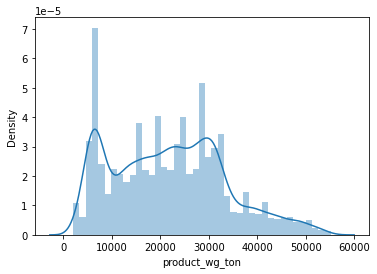

In [36]:
sns.distplot(data_rural['product_wg_ton'])

In [80]:
data_urban = data[data['Location_type']=='Urban']

C:\Users\Shubham Dandak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product_wg_ton', ylabel='Density'>

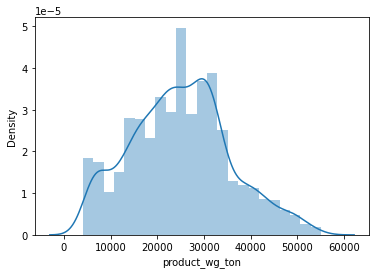

In [35]:
sns.distplot(data_urban['product_wg_ton'])

In [78]:
data_rural = data[['Location_type','zone', 'product_wg_ton']]

In [79]:
data_urban = data[['Location_type','zone' ,'product_wg_ton']]

Normality test using Shapiro-Wilk test

In [31]:
from scipy.stats import shapiro
stat ,p = shapiro(data_rural['product_wg_ton'])
print('stat=%.2f, p=%.20f' %(stat,p))
if p>0.05:
    print('Normal Distribution')
else:
    print('Not a normal distribution')

stat=0.97, p=0.00000000000000000000
Not a normal distribution


C:\Users\Shubham Dandak\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [33]:
from numpy.random import randn
DataToTest = randn(100)

In [34]:
DataToTest

array([ 1.71531596,  0.78520678, -2.34923311,  0.60061305,  0.37662123,
       -0.39873247, -0.16668891,  1.24414315, -0.11292451, -1.825118  ,
        0.22435815,  0.37700546, -1.09583426,  1.64201907,  0.42315905,
       -0.10005701, -2.09954796,  0.36401929, -0.75885408, -0.18699722,
        0.20306641, -0.21639594,  0.31584523,  0.15728262, -0.45630019,
       -0.91016835,  1.13447598,  0.64803861, -0.27081126,  0.94006126,
        0.18606644, -0.40631471, -0.14566446, -0.22209332, -1.13111711,
        1.74630545, -0.55263058,  1.12918949,  0.37457349, -0.99656014,
       -2.67371705,  0.71856192,  1.63209361,  1.3295492 , -1.29757025,
       -1.93452086, -0.24268767, -1.51412122, -0.4407419 , -0.70349549,
        1.57484877,  0.32198575,  0.65572521, -0.06428536,  0.58255852,
       -0.1960848 ,  1.10118589, -0.81839911,  1.23630538,  0.73582239,
        0.53424712, -0.58039234,  1.46393873,  0.92684968, -0.11851684,
        0.30970598, -0.09640904,  0.56766732, -0.37410877,  1.02

In [86]:
data_rural_sample = data_rural[['Location_type','zone','product_wg_ton']]
data_rural_sample

,Location_type,zone,product_wg_ton
1,Rural,North,5074
2,Rural,South,23137
3,Rural,North,22115
4,Rural,North,24071
5,Rural,West,32134
...,...,...,...
22145,Rural,North,29138
22146,Rural,South,33108
22147,Rural,North,24072
22148,Rural,North,15055


In [88]:
data_urban_sample = data_urban[['Location_type','zone','product_wg_ton']]
data_urban_sample

,Location_type,zone,product_wg_ton
0,Urban,West,17115
12,Urban,North,5124
24,Urban,West,15125
45,Urban,West,31113
49,Urban,South,44116
...,...,...,...
22097,Urban,North,41078
22104,Urban,North,29064
22134,Urban,North,18114
22135,Urban,South,26114


In [89]:
data_urban_sample = data_urban_sample[data_urban_sample['Location_type']=='Urban']

In [90]:
data_rural_sample = data_rural_sample[data_rural_sample['Location_type']=='Rural']

In [93]:
H0_rural = sum(data_rural_sample['product_wg_ton'])
H0_rural

443873501

In [76]:
H0_urban = sum(data_urban['product_wg_ton'])
H0_urban

45348694

In [48]:
import scipy.stats as stats

In [49]:
for X in data_rural.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,data_rural[X].skew(),np.max(abs(stats.zscore(data_rural[X])))))

The skewness and Max_Z-Score value for product_wg_ton is 0.35617716998825283 and 2.8540405985053985 respectively


In [50]:
data_2 = data[data['zone']=='North']

In [51]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9069 entries, 1 to 22148
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 9069 non-null   object 
 1   WH_capacity_size              9069 non-null   object 
 2   zone                          9069 non-null   object 
 3   WH_regional_zone              9069 non-null   object 
 4   num_refill_req_l3m            9069 non-null   int64  
 5   transport_issue_l1y           9069 non-null   int64  
 6   Competitor_in_mkt             9069 non-null   int64  
 7   retail_shop_num               9069 non-null   int64  
 8   wh_owner_type                 9069 non-null   object 
 9   distributor_num               9069 non-null   int64  
 10  flood_impacted                9069 non-null   int64  
 11  flood_proof                   9069 non-null   int64  
 12  electric_supply               9069 non-null   int64  
 13  di

In [54]:
sum(data_2['product_wg_ton']/9069)

22215.07542176648

In [55]:
data_urban.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 0 to 22136
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Location_type   1816 non-null   object
 1   product_wg_ton  1816 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.6+ KB


In [94]:
data_urban_avg = sum(data_urban['product_wg_ton']/1816)
data_urban_avg

24971.747797356857

In [96]:
data_rural_avg = sum(data_urban['product_wg_ton']/20334)
data_rural_avg

2230.1905183436593

##### By observing the average values of both the locations, we can conclude that our null hypothesis(H0) is valid in this scenario

## Assumption 2: 
- Number of refilling requests is directly related to product weight tonnes i.e. more the number of refilling requests more the product weight tonne will be (H0 = Both refilling and product weight tonne are directly proportional, H1 = Both are inversely proportional)

In [122]:
data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [123]:
data_a2 = data[['num_refill_req_l3m','product_wg_ton']]

In [124]:
data_a2.head()

,num_refill_req_l3m,product_wg_ton
0,3,17115
1,0,5074
2,1,23137
3,7,22115
4,3,24071


C:\Users\Shubham Dandak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_refill_req_l3m', ylabel='count'>

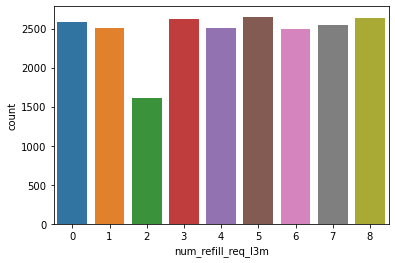

In [125]:
sns.countplot(data_a2['num_refill_req_l3m'])

In [133]:
ref_req_8 = data_a2[data_a2['num_refill_req_l3m']==8]
sum(ref_req_8['product_wg_ton']/2642)

21948.51514004536

In [136]:
ref_req_7 = data_a2[data_a2['num_refill_req_l3m']==7]
sum(ref_req_7['product_wg_ton']/2541)

22224.031877213692

In [139]:
ref_req_6 = data_a2[data_a2['num_refill_req_l3m']==6]
sum(ref_req_6['product_wg_ton']/2491)

22028.81975110395

In [142]:
ref_req_5 = data_a2[data_a2['num_refill_req_l3m']==5]
sum(ref_req_5['product_wg_ton']/2651)

22049.026405130106

In [145]:
ref_req_4 = data_a2[data_a2['num_refill_req_l3m']==4]
sum(ref_req_4['product_wg_ton']/2513)

22151.125746120248

In [148]:
ref_req_3 = data_a2[data_a2['num_refill_req_l3m']==3]
sum(ref_req_3['product_wg_ton']/2618)

22509.43277310928

In [151]:
ref_req_2 = data_a2[data_a2['num_refill_req_l3m']==2]
sum(ref_req_2['product_wg_ton']/1608)

21601.854477611912

In [154]:
ref_req_1 = data_a2[data_a2['num_refill_req_l3m']==1]
sum(ref_req_1['product_wg_ton']/2503)

22044.66280463444

In [157]:
ref_req_0 = data_a2[data_a2['num_refill_req_l3m']==0]
sum(ref_req_0['product_wg_ton']/2583)

22039.545876887303

In [166]:
plt.figure(figsize=(17,10))
sns.subplots(x=data_a2['num_refill_req_l3m'],y=data_a2['product_wg_ton'],palette='CMRmap')
addlabels(x,y)
plt.show()

AttributeError: module 'seaborn' has no attribute 'subplots'

<Figure size 1224x720 with 0 Axes>